#Imports

In [ ]:
# !pip install nltk
!pip install -U expertai-nlapi

Requirement already up-to-date: expertai-nlapi in /usr/local/lib/python3.6/dist-packages (1.0.4)


In [ ]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(42)

# import nltk
import expertai

from collections import defaultdict

1


## define env vars

In [ ]:
os.environ["EAI_USERNAME"] = 'junruihu@gmail.com'
os.environ["EAI_PASSWORD"] = '4@zWwWq@riyqxy6'

## init NLP api

In [ ]:
from expertai.nlapi.cloud.client import ExpertAiClient
client = ExpertAiClient()

ModuleNotFoundError: ignored

## read in csv

In [ ]:
DF = pd.read_csv('./memegenerator.csv')

# Data analysis

In [ ]:
print(DF)

        Meme ID  ...                                     Alternate Text
0      10509464  ...                                        seems legit
1      12285257  ...  Fret not I stayed at a Holiday Inn Express las...
2      20612245  ...  hello airplanes? yeah, this is blimps. Yeah, y...
3      20614628  ...  LEGS IN COVER. TOO HOT. LEGS OUT OF COVER. TOO...
4      24194267  ...  one does not simply  put toothpaste back in th...
...         ...  ...                                                ...
57647  35013447  ...                     sequeira después del...  3 a 1
57648  35014404  ...  IF A NECROPHILiac ENCOUNTERs a zombie, Who Sho...
57649  35014490  ...          znam internety przyjebe xzibit bez yodawg
57650  35014507  ...   It's 1,006 no wait i had the scouter upside down
57651  35017185  ...     if you go to Iraq you're gonna have a bad time

[57652 rows x 7 columns]


In [ ]:
print(DF.columns)

Index(['Meme ID', 'Archived URL', 'Base Meme Name', 'Meme Page URL',
       'MD5 Hash', 'File Size (In Bytes)', 'Alternate Text'],
      dtype='object')


base meme name are meme classes

[count unique vals per col](https://stackoverflow.com/questions/30503321/finding-count-of-distinct-elements-in-dataframe-in-each-column)

In [ ]:
print(DF.nunique())

Meme ID                 57652
Archived URL            57652
Base Meme Name           1913
Meme Page URL           57377
MD5 Hash                56181
File Size (In Bytes)    11487
Alternate Text          55621
dtype: int64


## dict of meme names that map to individuals

[iter thru rows of DF (using generator)](https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas)

[nltk sentiment analysis](https://www.digitalocean.com/community/tutorials/how-to-perform-sentiment-analysis-in-python-3-using-the-natural-language-toolkit-nltk)

- [another one](https://towardsdatascience.com/basic-binary-sentiment-analysis-using-nltk-c94ba17ae386)

[sentiment analysis lesson](https://www.datacamp.com/community/tutorials/simplifying-sentiment-analysis-python)

In [ ]:
memes = defaultdict(set)
sentiments = defaultdict(list)

In [ ]:
for index, row in DF.iterrows():
  # check alt text makes sense
  alt_text = row['Alternate Text']
  meme_name = row['Base Meme Name']



  memes[meme_name].add(alt_text)
  # print(row['Base Meme Name'])
  # break

## todos
- filtering out non english alt text (lang detect API)
- how to get all memes / scrape from memegen
- could write scraper to get newer memes

In [ ]:
memes

defaultdict(set,
            {'Spiderman Approves': {'10/10 would bang',
              'I care this much',
              'SHAT DI FAK AAAP',
              "everyone's out enjoying halloween and i'm just sitting here masturbating into some poor girls pumpkin socks.",
              'seems legit'},
             'Alright Then Business Kid': {'5 mintues till bedtime I can work with that',
              '5 minutes till bed I can work with that',
              'A toy truck? I shall have fun with this',
              'Cornflower Blue was nice,  but I prefer the merlot',
              "Crayons and markers? Alright, i'll see what i can do",
              'Fret not I stayed at a Holiday Inn Express last night',
              'Heute All in auf Dänemark',
              "I'd say negotiations went better than expected bedtime was pushed back 10 minutes",
              'Im getting this job.',
              'ME CANSE DE SER NIÑO MAÑANA COBRO Y ME VOY DE PUTAS',
              'Me estoy oliendo un... NEG

## histogram of popularity (counts)

In [ ]:
# for meme, count in meme.items():
counts = [(len(instances), name) for name, instances in memes.items()]

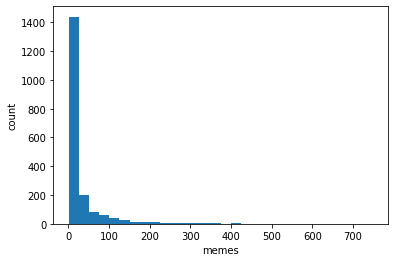

In [ ]:
plt.hist([count for count, name in counts], bins=30)  # density=False would make counts
plt.ylabel('count')
plt.xlabel('memes');

note how the 100 most popular memes names for most of memes

let's filter memes by those having at least 100 instances

In [ ]:
memes_popular = [(count, name) for count, name in counts if count > 100]
memes_popular.sort(reverse=True)
print(len(memes_popular), memes_popular)

140 [(749, 'Y U No'), (653, 'Futurama Fry'), (604, 'Insanity Wolf'), (518, 'Philosoraptor'), (503, 'Success Kid'), (499, 'The Most Interesting Man In The World'), (468, 'Foul Bachelor Frog'), (446, 'Socially Awkward Penguin'), (415, 'Advice Yoda Gives'), (411, 'Forever Alone'), (407, 'Joseph Ducreux'), (396, 'Slowpoke'), (380, 'Good Guy Greg'), (374, 'we got a badass over here'), (356, 'Butthurt Dweller'), (354, 'Courage Wolf'), (351, 'Willy Wonka'), (346, 'Yo Dawg'), (341, 'Chuck Norris'), (336, 'Conspiracy Keanu'), (324, 'success baby'), (318, 'Annoying Gamer Kid'), (307, 'Trollface'), (290, 'All the things'), (289, 'Hipster Kitty'), (286, 'Sunny Student'), (284, 'Me Gusta'), (279, 'Annoying Facebook Girl'), (277, 'Stoner Stanley'), (273, 'one'), (273, 'Disaster Girl'), (270, 'Scumbag Steve'), (264, 'Provincial Man'), (247, 'Bad luck Brian meme'), (244, 'Angry School Boy'), (243, 'First world Problems II'), (241, 'Fat Girl'), (234, 'Wise Confucius'), (231, 'Grumpy Cat'), (227, 'AY SI

sort base memes by popularity (most popular first)

## expert ai test

In [ ]:
LANGUAGE = 'en'
PLACEHOLDER_TEXT = 'Today is a good day. I love to go to mountain.'
PLACEHOLDER_TEXT2 = 'I hate life'

In [ ]:
document = client.specific_resource_analysis(
    body={"document": {"text": PLACEHOLDER_TEXT2}},
    params={'language': LANGUAGE, 'resource': 'sentiment'})
print(document.sentiment.overall)